In [82]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import numpy as np
import pandas as pd
from simulator import LungCancerProgressionGenerator

# Generate datasets for both scenarios
generator = LungCancerProgressionGenerator(num_patients=100000, doubling_time=134)
df_without_test = generator.generate_dataset(use_blood_test=False)
df_with_test = generator.generate_dataset(use_blood_test=True)

# Function to calculate and print statistics
def print_statistics(df, scenario):
    print(f"\nStatistics for {scenario}:")
    
    # Distribution of cancer stages at diagnosis
    stage_at_diagnosis = df[df['months_since_diagnosis'] == 0]['target_state'].value_counts(normalize=True).to_dict()
    print("\nDistribution of cancer stages at diagnosis:")
    for stage, count in stage_at_diagnosis.items():
        print(f"Stage {stage}: {count * 100:.2f}%")
    
    # Percentage of late-stage diagnoses (Stage III and IV)
    late_stage = (stage_at_diagnosis.get(3, 0) + stage_at_diagnosis.get(4, 0))
    print(f"\nPercentage of late-stage diagnoses (Stage III and IV): {late_stage * 100:.2f}%")
    
    # 1-year survival rate
    total_patients = df['sample_id'].nunique()
    patients_1year = df.groupby('sample_id').filter(lambda x: x['months_since_diagnosis'].max() > 12)
    survival_rate_1year = patients_1year['sample_id'].count() / total_patients
    # print(survival_rate_1year)
    print(f"\n1-year survival rate: {survival_rate_1year:.2f}")
    
    # Average age at diagnosis
    avg_age_at_diagnosis = df.groupby('sample_id')['age_at_diagnosis'].first().mean()
    print(f"\nAverage age at diagnosis: {avg_age_at_diagnosis:.2f} years")

    # # Average time spent in each state
    # state_durations = df.groupby('sample_id').apply(lambda x: x.groupby('origin_state')['time_transition_to_target'].diff().mean())
    # print("\nAverage time spent in each state (months):")
    # for state, duration in state_durations.mean().items():
    #     if state != 0 and not np.isnan(duration):  # Exclude Healthy state and NaN values
    #         print(f"State {state}: {duration:.2f}")

# Print statistics for both scenarios
print_statistics(df_without_test, "Without Blood Test")
print_statistics(df_with_test, "With Perfect Biennial Blood Test")

# Save the datasets to CSV files
df_without_test.to_csv('lung_cancer_data_15years_without_blood_test_accurate.csv', index=False)
df_with_test.to_csv('lung_cancer_data_15years_with_perfect_biennial_blood_test.csv', index=False)
print("\nData saved to 'lung_cancer_data_15years_without_blood_test_accurate.csv' and 'lung_cancer_data_15years_with_perfect_biennial_blood_test.csv'")


Statistics for Without Blood Test:

Distribution of cancer stages at diagnosis:
Stage 1: 54.70%
Stage 3: 18.17%
Stage 2: 13.85%
Stage 4: 13.27%

Percentage of late-stage diagnoses (Stage III and IV): 31.44%

1-year survival rate: 22.30

Average age at diagnosis: 69.45 years

Statistics for With Perfect Biennial Blood Test:

Distribution of cancer stages at diagnosis:
Stage 1: 82.28%
Stage 2: 17.72%

Percentage of late-stage diagnoses (Stage III and IV): 0.00%

1-year survival rate: 28.73

Average age at diagnosis: 69.21 years

Data saved to 'lung_cancer_data_15years_without_blood_test_accurate.csv' and 'lung_cancer_data_15years_with_perfect_biennial_blood_test.csv'


In [101]:
print(generator.get_monthly_death_probability(1))
print(generator.get_monthly_death_probability(2))
print(generator.get_monthly_death_probability(3))
print(generator.get_monthly_death_probability(4))

0.007154002685681893
0.01515549399745375
0.03112402340674325
0.04870291331009746


In [102]:
# check numbers of deceased patients in df_with_test and df_without_test
print(df_with_test[df_with_test['target_state'] == 5]['sample_id'].nunique())
print(df_without_test[df_without_test['target_state'] == 5]['sample_id'].nunique())

1685
1717


In [103]:
df_without_test

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target
0,58,0,1,-1,0,NaN,68,69
1,58,1,1,-1,1,NaN,69,70
2,58,1,1,-1,2,NaN,70,71
3,58,1,1,-1,3,NaN,71,72
4,58,1,1,-1,4,NaN,72,73
...,...,...,...,...,...,...,...,...
93448,99988,4,4,23,69,73.0,71,72
93449,99988,4,4,24,70,73.0,72,73
93450,99988,4,4,25,71,73.0,73,74
93451,99988,4,4,26,72,73.0,74,75


In [104]:
df_with_test

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target
0,102,0,1,-1,0,NaN,175,176
1,102,1,1,-1,1,NaN,176,177
2,102,1,1,-1,2,NaN,177,178
3,102,1,1,-1,3,NaN,178,179
4,102,1,1,-1,4,NaN,179,180
...,...,...,...,...,...,...,...,...
101748,99953,4,4,34,36,61.0,58,59
101749,99953,4,4,35,37,61.0,59,60
101750,99953,4,4,36,38,61.0,60,61
101751,99953,4,4,37,39,61.0,61,62


Time: 0.0
State counts: target_state
1    849
3    282
2    215
4    206
Name: count, dtype: int64
Time: 1.0
State counts: target_state
1    804
3    246
2    233
4    230
5     30
6      9
Name: count, dtype: int64
Time: 2.0
State counts: target_state
1    744
4    262
2    254
3    212
5     28
6     22
Name: count, dtype: int64
Adding 30 deceased patients at time 2.0 for blood test =  Cancer Progression Without Blood Test
Time: 3.0
State counts: target_state
1    702
4    286
2    264
3    192
6     26
5     24
Name: count, dtype: int64
Adding 58 deceased patients at time 3.0 for blood test =  Cancer Progression Without Blood Test
Time: 4.0
State counts: target_state
1    668
4    317
2    265
3    165
6     33
5     22
Name: count, dtype: int64
Adding 82 deceased patients at time 4.0 for blood test =  Cancer Progression Without Blood Test
Time: 5.0
State counts: target_state
1    635
4    340
2    268
3    138
6     39
5     28
Name: count, dtype: int64
Adding 104 deceased patients

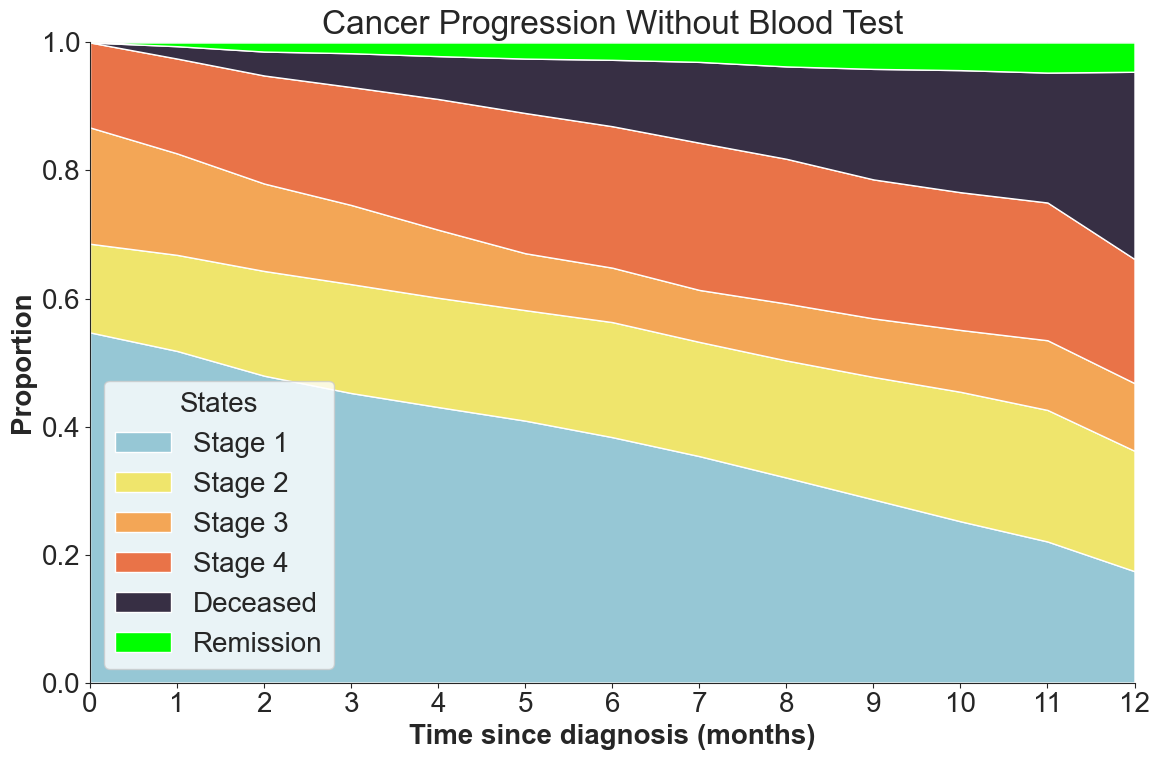

Time: 0.0
State counts: target_state
1    1806
2     389
Name: count, dtype: int64
Time: 1.0
State counts: target_state
1    1728
2     428
5      21
6      18
Name: count, dtype: int64
Time: 2.0
State counts: target_state
1    1651
2     471
6      34
5      18
Name: count, dtype: int64
Adding 21 deceased patients at time 2.0 for blood test =  Cancer Progression With Blood Test
Time: 3.0
State counts: target_state
1    1554
2     529
6      50
5      17
3       6
Name: count, dtype: int64
Adding 39 deceased patients at time 3.0 for blood test =  Cancer Progression With Blood Test
Time: 4.0
State counts: target_state
1    1481
2     513
6      63
3      62
5      20
Name: count, dtype: int64
Adding 56 deceased patients at time 4.0 for blood test =  Cancer Progression With Blood Test
Time: 5.0
State counts: target_state
1    1384
2     509
3     129
6      74
5      23
Name: count, dtype: int64
Adding 76 deceased patients at time 5.0 for blood test =  Cancer Progression With Blood Test


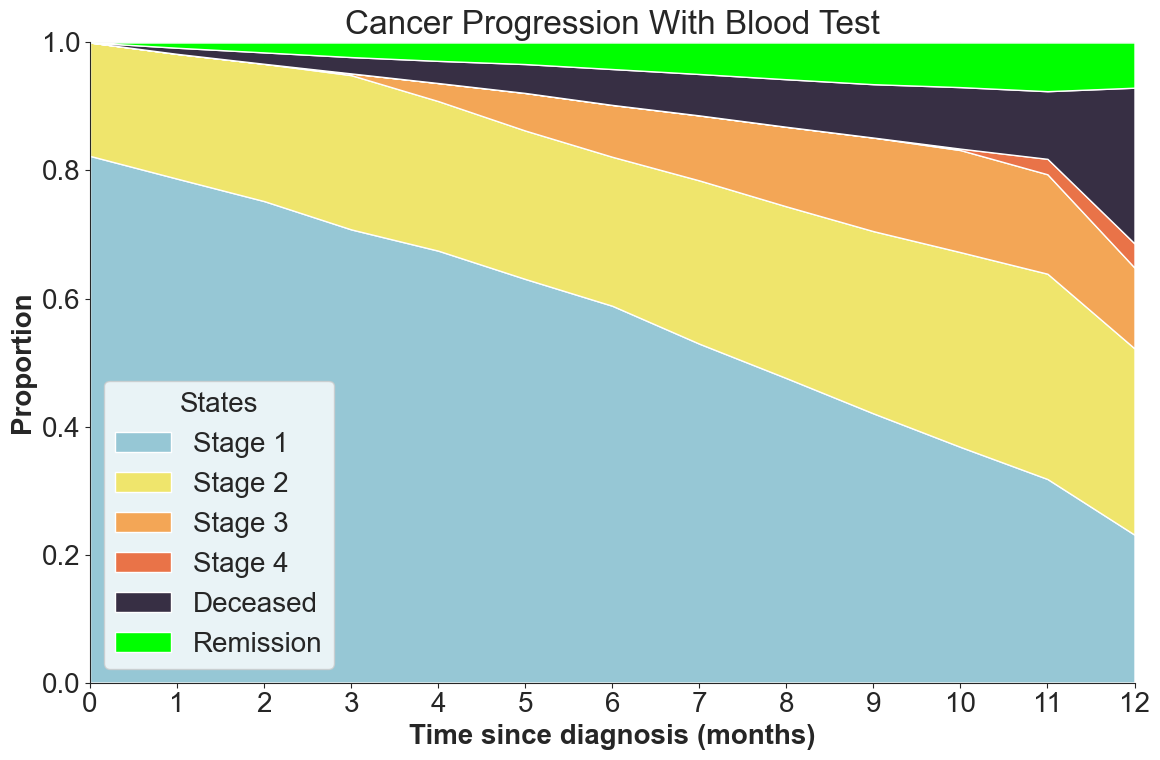

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from data_prep import align_to_diagnosis
import seaborn as sns
sns.set_style('ticks')

def create_stacked_area_chart(df, title, save_path=None):
    # Align data to diagnosis point
    aligned_df = align_to_diagnosis(df)
    
    # Ensure all columns are numeric
    for col in aligned_df.columns:
        if aligned_df[col].dtype == 'object':
            aligned_df[col] = pd.to_numeric(aligned_df[col], errors='coerce')
    
    # Remove any rows with NaN values
    aligned_df = aligned_df.dropna()
    
    # Process the aligned data
    time_points = sorted(aligned_df['adjusted_time'].unique())
    states = sorted(aligned_df['target_state'].unique())
    
    initial_states_count = len(aligned_df[aligned_df['adjusted_time'] == 0]['target_state'])
    # Create a DataFrame to hold the proportions
    proportions = pd.DataFrame(index=time_points, columns=states)
    
    prev_censored = 0
    
    # Calculate proportions for each state at each time point
    for time in time_points:
        time_slice = aligned_df[aligned_df['adjusted_time'] == time]
        state_counts = time_slice['target_state'].value_counts()
        total = len(time_slice['sample_id'].unique())
        # for the difference between current total and initial total, fill with state 5 (death)
        diff = initial_states_count - total
        
        # check number of censored patients
        prev_censored = time_slice[time_slice['time_transition_to_target'] == 180]['sample_id'].nunique()
        
        if time < 25:
            print('Time:', time)
            print('State counts:', state_counts)
        
        if diff > 0:
            state_counts[5] = state_counts.get(5, 0) + diff
            print('Adding', diff, 'deceased patients at time', time, 'for blood test = ', title)
        for state in states:
            proportions.loc[time, state] = state_counts.get(state, 0) / initial_states_count
            
    proportions.to_csv('proportions_temp.csv')
    
    proportions = pd.read_csv('proportions_temp.csv', header=None, index_col=0)
    
    # Create the stacked area plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # increase font size
    plt.rcParams.update({'font.size': 20})
    # make it bold 
    plt.rcParams['axes.labelweight'] = 'bold'
    
    
    # Custom color palette
    colors = ['#96C7D5', '#EFE56C', '#F3A656', '#E97348', '#372F44']

    
    colors = []#.reshape(5,3)
    #use hex color
    colors.append((150, 199, 213))
    colors.append((239, 229, 108))
    colors.append((243, 166, 86))
    colors.append((233, 115, 72))
    colors.append((55, 47, 68))
    # light green for remission
    colors.append((0, 255, 0))
    
    colors = np.array(colors) / 255
    
    # delete first row in proportions
    proportions = proportions.iloc[1:]
    
    month = 12
    month = month + 1
    # cut off at 5 years
    proportions = proportions.iloc[:month]
    
    # rename states
    states = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Deceased', 'Remission']
    
    ax.stackplot(proportions.index, proportions.T, labels=states, colors=colors)
    
    # Customize the plot
    ax.set_xlabel('Time since diagnosis (months)')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    # ax.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
    # put legend inside the plot on the bottom left
    ax.legend(title='States', loc='lower left')
    ax.set_xlim(0, month - 1)
    ax.set_ylim(0, 1)
    
    # set x ticks
    ax.set_xticks(np.arange(0, month, 1))
    # set x tick labels
    ax.set_xticklabels(np.arange(0, month, 1))
    # Add gridlines
    ax.grid(True, alpha=0.3)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=600)
    plt.show()
    return proportions, aligned_df

# Assuming df_without_test and df_with_test are your DataFrames
proportions_without, aligned_without = create_stacked_area_chart(df_without_test, "Cancer Progression Without Blood Test", save_path='figures/cancerProgressionWithoutBloodtest.pdf')
proportions_with, aligned_with = create_stacked_area_chart(df_with_test, "Cancer Progression With Blood Test", save_path='figures/cancerProgressionWithBloodtest.pdf')

In [106]:
df_with_test.head()

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target
0,102,0,1,-1,0,NaN,175,176
1,102,1,1,-1,1,NaN,176,177
2,102,1,1,-1,2,NaN,177,178
3,102,1,1,-1,3,NaN,178,179
4,102,1,1,-1,4,NaN,179,180


In [96]:
aligned_with

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target,adjusted_time
2,57,1,1,0,2,77.0,120,121,0.0
3,57,1,6,1,3,77.0,121,122,1.0
4,57,6,6,1,4,77.0,122,123,2.0
5,57,6,6,1,5,77.0,123,124,3.0
6,57,6,6,1,6,77.0,124,125,4.0
...,...,...,...,...,...,...,...,...,...
100241,99938,4,4,29,36,65.0,77,78,29.0
100242,99938,4,4,30,37,65.0,78,79,30.0
100243,99938,4,4,31,38,65.0,79,80,31.0
100244,99938,4,4,32,39,65.0,80,81,32.0


In [97]:
aligned_without

,sample_id,origin_state,target_state,months_since_diagnosis,months_since_onset,age_at_diagnosis,time_entry_to_origin,time_transition_to_target,adjusted_time
55,198,4,4,0,43,78.0,108,109,0.0
56,198,4,4,1,44,78.0,109,110,1.0
57,198,4,4,2,45,78.0,110,111,2.0
58,198,4,4,3,46,78.0,111,112,3.0
59,198,4,4,4,47,78.0,112,113,4.0
...,...,...,...,...,...,...,...,...,...
96470,99869,1,1,4,4,68.0,172,173,4.0
96471,99869,1,1,5,5,68.0,173,174,5.0
96472,99869,1,1,6,6,68.0,174,175,6.0
96473,99869,1,1,7,7,68.0,175,176,7.0


In [107]:
# plot 2 year Overall survival with and without blood test using lifelines with number at risk and confidence interval
# using aligned_with and aligned_without

from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.utils import median_survival_times
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

def plot_survival_curves(aligned_df_with, aligned_df_without):
    # filter for only deceased patients
    # aligned_df_with = aligned_df_with[aligned_df_with['target_state'] == 5]
    # aligned_df_without = aligned_df_without[aligned_df_without['target_state'] == 5]
    
    # filter for only 1 years and more than -1
    aligned_df_with = aligned_df_with[aligned_df_with['months_since_diagnosis'] <= 12] 
    aligned_df_without = aligned_df_without[aligned_df_without['months_since_diagnosis'] <= 12]
    
    # keep one row per patient, with the last state
    aligned_df_with = aligned_df_with.sort_values('months_since_diagnosis').groupby('sample_id').tail(1)
    aligned_df_without = aligned_df_without.sort_values('months_since_diagnosis').groupby('sample_id').tail(1)
    
    
    # Create a KaplanMeierFitter object
    kmf_with = KaplanMeierFitter()
    kmf_without = KaplanMeierFitter()

    # Fit the data to the model
    kmf_with.fit(durations=aligned_df_with['months_since_diagnosis'], event_observed=aligned_df_with['target_state'] == 5, label='With Blood Test')
    kmf_without.fit(durations=aligned_df_without['months_since_diagnosis'], event_observed=aligned_df_without['target_state'] == 5, label='Without Blood Test')
    
    # Add 2 year OS rate with confidence interval in legend
    two_year_os_with = kmf_with.survival_function_at_times([12]).values[0]
    two_year_os_without = kmf_without.survival_function_at_times([12]).values[0]
    
    # get confidence interval
    # print(kmf_without.survival_function_at_times([12]))
    print(kmf_with.confidence_interval_survival_function_.iloc[12]['With Blood Test_lower_0.95'])
    print(kmf_with.confidence_interval_survival_function_.iloc[12]['With Blood Test_upper_0.95'])
    with_upper = kmf_with.confidence_interval_survival_function_.iloc[12]['With Blood Test_upper_0.95']
    with_lower = kmf_with.confidence_interval_survival_function_.iloc[12]['With Blood Test_lower_0.95']
    # print(kmf_without.survival_function_at_times([12]))
    print(kmf_without.confidence_interval_survival_function_.iloc[12]['Without Blood Test_lower_0.95'])
    print(kmf_without.confidence_interval_survival_function_.iloc[12]['Without Blood Test_upper_0.95'])
    without_upper = kmf_without.confidence_interval_survival_function_.iloc[12]['Without Blood Test_upper_0.95']
    without_lower = kmf_without.confidence_interval_survival_function_.iloc[12]['Without Blood Test_lower_0.95']
    # ci_with = kmf_with.confidence_interval_survival_function_at_times([12])
    # ci_without = kmf_without.confidence_interval_survival_function_at_times([12])
    

    # Create a plot
    fig, ax = plt.subplots(figsize=(14, 10))
    kmf_with.plot(ax=ax, label='With Blood Test (1-year OS: {:.2f} [{:.2f} - {:.2f}])'.format(two_year_os_with, with_lower, with_upper))
    kmf_without.plot(ax=ax, label='Without Blood Test (1-year OS: {:.2f} [{:.2f} - {:.2f}])'.format(two_year_os_without, without_lower, without_upper))
    add_at_risk_counts(kmf_with, kmf_without, ax=ax)
    ax.set_title('Overall Survival with and without Blood Test')
    ax.set_xlabel('Months since diagnosis')
    ax.set_ylabel('Survival probability')
    
    
    # Perform log-rank test
    results = logrank_test(aligned_df_with['months_since_diagnosis'], aligned_df_without['months_since_diagnosis'], event_observed_A=aligned_df_with['target_state'] == 5, event_observed_B=aligned_df_without['target_state'] == 5)
    print(f"\nLog-rank test p-value: {results.p_value}")
    
    
    print(f"\n1-year OS with blood test: {two_year_os_with:.2f}")
    print(f"1-year OS without blood test: {two_year_os_without:.2f}")
    
    # modify labels 
    # plt.legend(['With Blood Test', 'Without Blood Test'])
    # plt.legend(['With Blood Test (2-year OS: {:.2f})'.format(two_year_os_with), 'Without Blood Test (2-year OS: {:.2f})'.format(two_year_os_without)])
    # Add p value to legend
    
    # ax.legend(['With Blood Test (1-year OS: {:.2f})'.format(two_year_os_with), 'Without Blood Test (1-year OS: {:.2f})'.format(two_year_os_without)])
    ax.plot([], [], ' ', label=f'p-value: {results.p_value:.2f}')
    
    plt.tight_layout()
    
    plt.savefig('figures/overallSurvivalWithAndWithoutBloodTest.pdf', dpi=600)
    
    # ax.legend(title='Blood Test')
    
    plt.show()

    # Print median survival times
    median_survival_with = median_survival_times(kmf_with)
    median_survival_without = median_survival_times(kmf_without)
    print(f"Median survival time with blood test: {median_survival_with:.2f} months")
    print(f"Median survival time without blood test: {median_survival_without:.2f} months")

    
    
    
    
    

0.8592978560088812
0.8880714117887677
0.7560542349788848
0.7982524339176795

Log-rank test p-value: 3.2377103838009723e-15

1-year OS with blood test: 0.87
1-year OS without blood test: 0.78


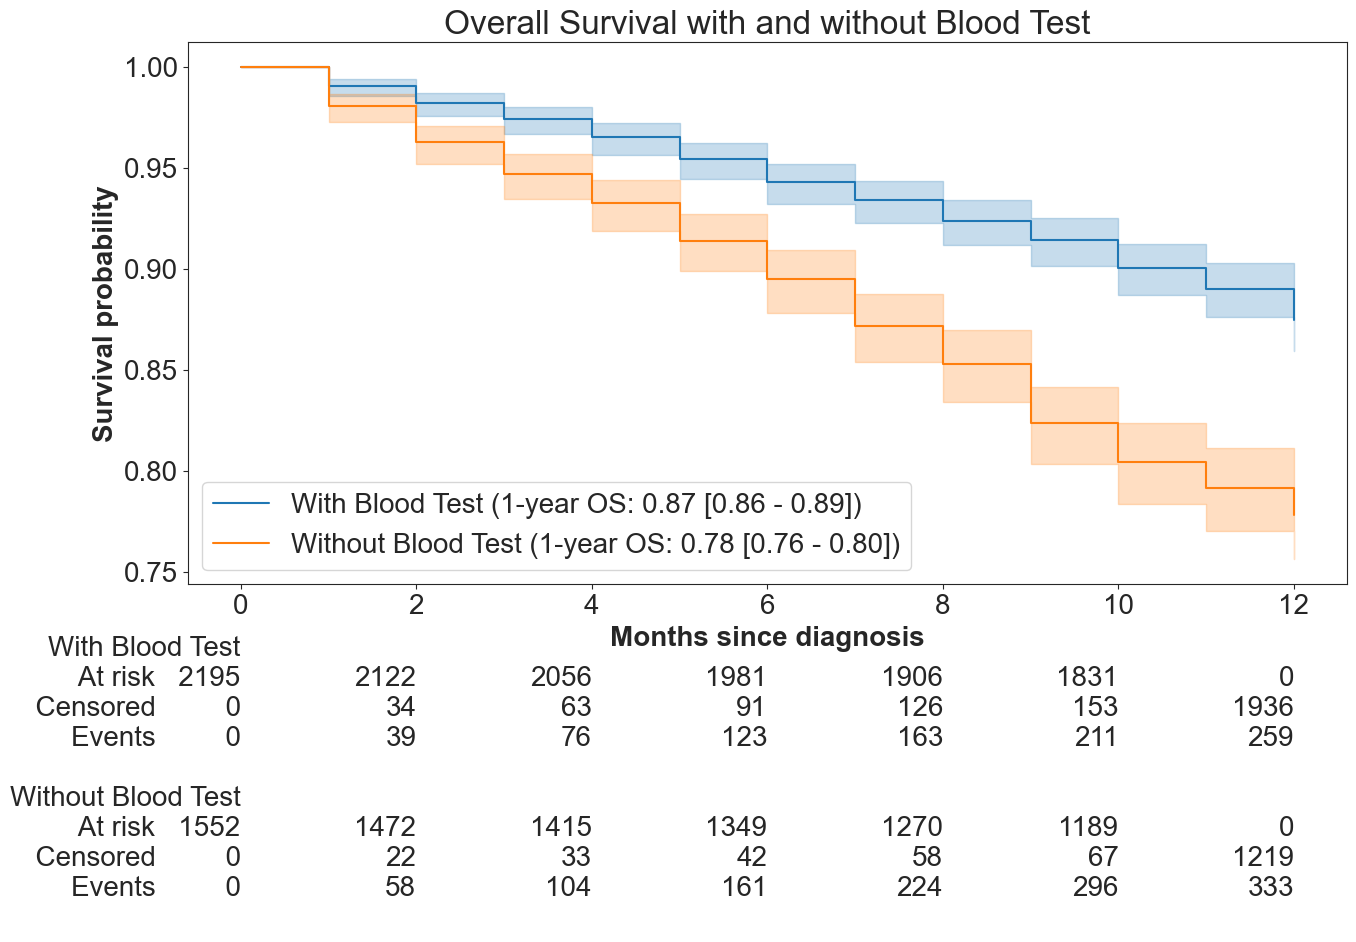

Median survival time with blood test: inf months
Median survival time without blood test: inf months


In [108]:
plot_survival_curves(aligned_with, aligned_without)

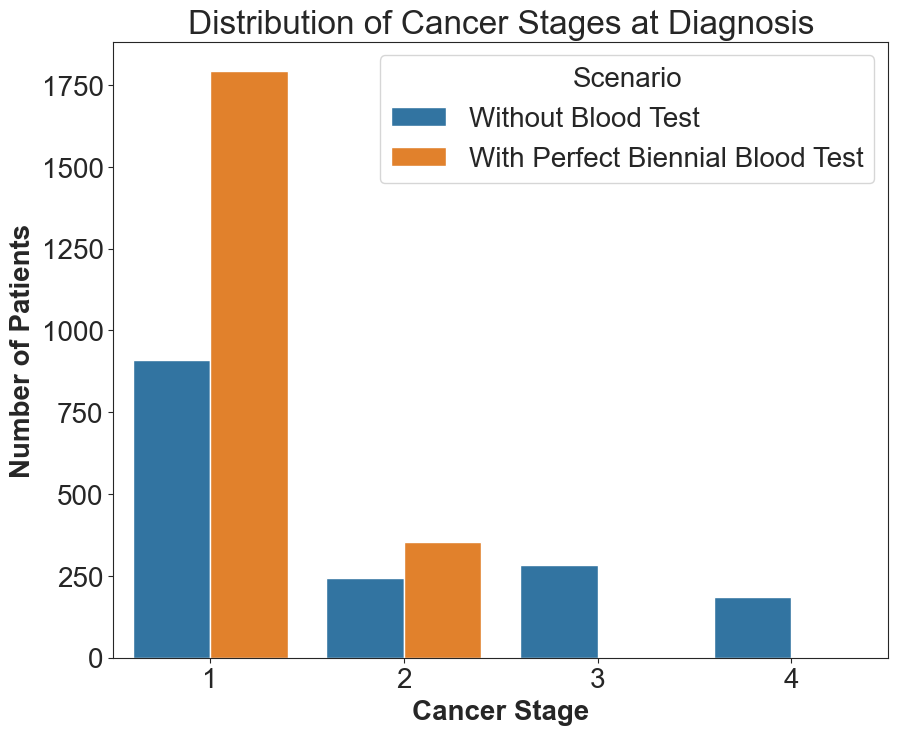

In [94]:
# Plot distribution of cancer stages at diagnosis
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the two datasets
df_without_test['scenario'] = 'Without Blood Test'
df_with_test['scenario'] = 'With Perfect Biennial Blood Test'
combined_df = pd.concat([df_without_test, df_with_test])

# Plot the distribution of cancer stages at diagnosis
plt.figure(figsize=(10, 8))
sns.countplot(data=combined_df[combined_df['months_since_diagnosis'] == 0], x='target_state', hue='scenario')
plt.title('Distribution of Cancer Stages at Diagnosis')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.legend(title='Scenario')
plt.show()
